# Predicting Medical Insurance Costs

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('insurance.csv')

# Display dataset overview
display(df.head())
print("="*43)
print(" MEDICAL INSURANCE COSTS DATASET OVERVIEW ")
print("="*43, "\n")
print(df.info(), "\n")
print("="*43)
print(" DATA SUMMARY ")
print("="*43, "\n")
print(df.describe(), "\n")
print("="*43)
print(" MISSING VALUES ")
print("="*43, "\n")
print(df.isnull().sum(), "\n")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 MEDICAL INSURANCE COSTS DATASET OVERVIEW 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

 DATA SUMMARY 

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000


# Dataset Overview

This dataset contains information on individual medical insurance costs and relevant demographic and personal characteristics. The goal is to build a predictive model to estimate medical expenses based on these factors.

## Dataset Columns

- **age**: Age of the primary beneficiary.
- **sex**: Gender of the insurance policyholder (`male`, `female`).
- **bmi**: Body Mass Index (BMI), a measure of body fat based on height and weight. A healthy BMI typically falls between 18.5 and 24.9.
- **children**: Number of dependents covered by the health insurance policy.
- **smoker**: Smoking status of the beneficiary (`yes`, `no`).
- **region**: Geographic location of the beneficiary in the U.S. (`northeast`, `southeast`, `southwest`, `northwest`).
- **charges**: The total medical costs billed to health insurance.

## Dataset Summary

- **Total records**: 1,338 entries  
- **Missing values**: None  
- **Numerical Features**:
  - **Age**: Ranges from 18 to 64, with an average of ~39 years.
  - **BMI**: Varies between 15.96 and 53.13, with an average of ~30.66.
  - **Children**: Number of dependents ranges from 0 to 5.
  - **Charges**: Medical expenses range from \\$1,121.87 to \\$63,770.43, with an average of ~$13,270.

## Observations

- The dataset is free of missing values.
- The `bmi` column has a wide range, which may indicate potential outliers.
- The `charges` column is highly variable, suggesting that different factors (e.g., smoking, age, BMI) might significantly impact medical costs.


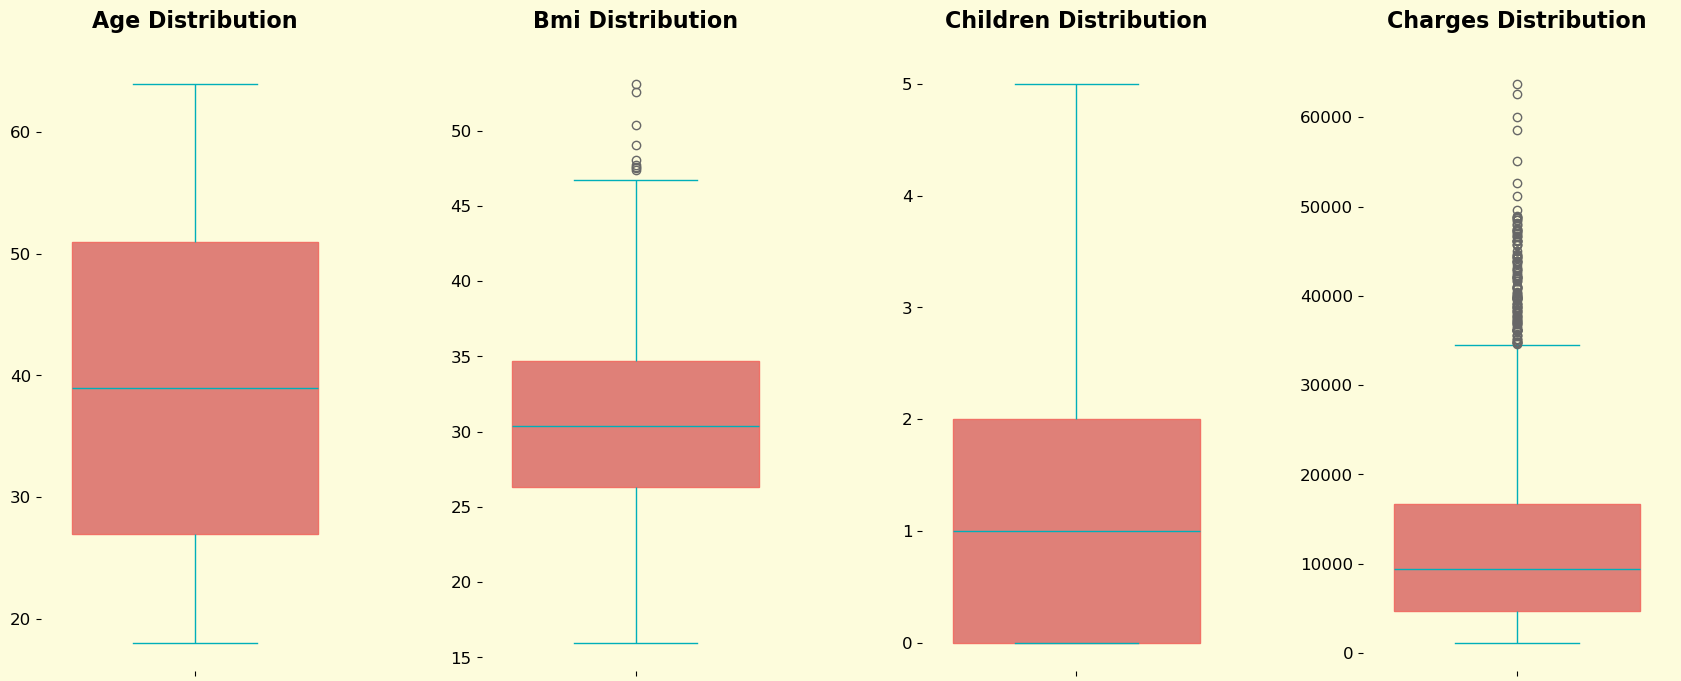

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Custom plot style
plt.rcParams.update({
    "axes.facecolor": "#FDFCDC",
    "figure.facecolor": "#FDFCDC",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 14,
    "axes.labelpad": 14,
})

# Define numerical columns
numerical_columns = ["age", "bmi", "children", "charges"]

# Set up the subplots
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(18, 8))

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(data=df, y=col, ax=ax, color='#F07167', 
                boxprops=dict(edgecolor="#F07167"), medianprops=dict(color="#00AFB9"), 
                whiskerprops=dict(color="#00AFB9"), capprops=dict(color="#00AFB9"))
    
    ax.set_title(f'{col.title()} Distribution', pad=20)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.grid(False)

    # Remove grid borders
    sns.despine(bottom=True, left=True)

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

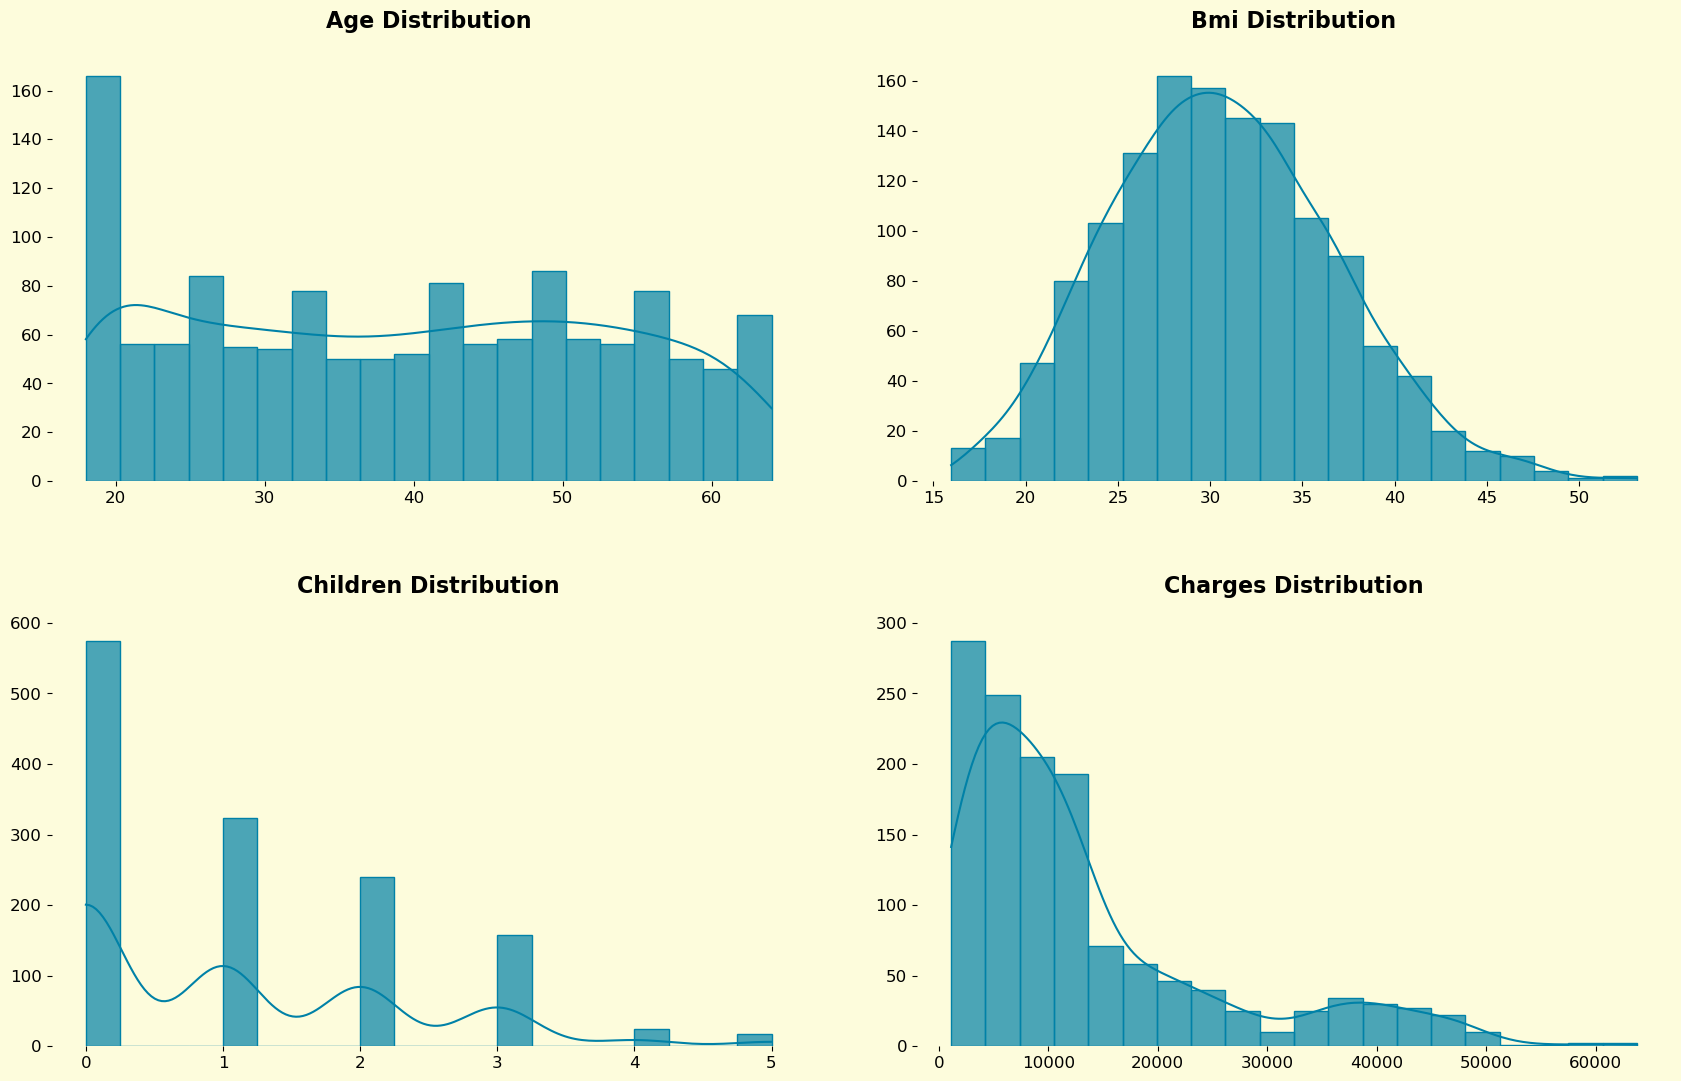

In [18]:
# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Flatten the axes array for easy iteration
ax = axes.flat  # Use .flat to iterate over a 2D array

# Plot histogram for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=20, kde=True, color='#0081A7', edgecolor='#0081A7', alpha=0.7, ax=ax[i])
    
    ax[i].set_title(f'{col.title()} Distribution', pad=20)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].grid(False)

    # Remove grid borders
    sns.despine(bottom=True, left=True)

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

# Distribution of Numerical Features

## Age Distribution
The dataset contains individuals ranging from **18 to 64 years old**. The most common age group is **18-22 years**, with **222 individuals**, followed by those aged **45-50 years** (**144 individuals**). The age distribution appears fairly balanced across different age groups, but there is a slight concentration of younger individuals.

## BMI Distribution
The **Body Mass Index (BMI)** values range from **15.92 to 53.13**. Most individuals have a BMI between **27.1 and 30.8** (**319 individuals**), followed by the **30.8 to 34.5** range (**288 individuals**). There is a right skew in the distribution, with fewer individuals having extremely high BMI values.

## Number of Children
The majority of individuals have **0 children** (**574 individuals**), and **1 child** is the next most common (**324 individuals**). The number of dependents decreases as the count increases, with very few individuals having **4 or 5 children**.

## Charges Distribution
The **medical charges** are highly skewed, ranging from **\\$1,059 to \$63,770**. About **40% of individuals** fall within the **lowest charge range (\\$1,059 - \$7,386)**. A significant portion of the population has medical costs below **$20,000**, while a smaller group incurs much higher expenses, likely influenced by factors such as smoking or chronic conditions.
